In [1]:
import os
import random
import torch
import numpy as np
from torchvision import models
from torch import nn, optim
from torch.optim import lr_scheduler
from torchsummary import summary

from vgg_l import VGG_L
from data_loading import Data
from model_training import train_model, plot_training_history
from model_testing import test_model, plot_examples

In [2]:
random_seed = 42
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
data = Data('C:/Users/weron/Pulpit/sem1/dl/proj1/archive')

In [5]:
model = VGG_L(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [6]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 48, 32, 32]           1,344
       BatchNorm2d-2           [-1, 48, 32, 32]              96
              ReLU-3           [-1, 48, 32, 32]               0
            Conv2d-4           [-1, 48, 32, 32]          20,784
       BatchNorm2d-5           [-1, 48, 32, 32]              96
              ReLU-6           [-1, 48, 32, 32]               0
         MaxPool2d-7           [-1, 48, 16, 16]               0
            Conv2d-8           [-1, 96, 16, 16]          41,568
       BatchNorm2d-9           [-1, 96, 16, 16]             192
             ReLU-10           [-1, 96, 16, 16]               0
           Conv2d-11           [-1, 96, 16, 16]          83,040
      BatchNorm2d-12           [-1, 96, 16, 16]             192
             ReLU-13           [-1, 96, 16, 16]               0
        MaxPool2d-14             [-1, 9

In [7]:
sample_input = torch.randn(1, 3, 32, 32).to(device)
model.eval()
with torch.no_grad():
    output = model(sample_input)
print(output.shape)

torch.Size([1, 10])


In [8]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.4597 Acc: 0.4586
valid Loss: 1.2841 Acc: 0.5303

Epoch 1/19
----------
train Loss: 1.1222 Acc: 0.5974
valid Loss: 1.0524 Acc: 0.6252

Epoch 2/19
----------
train Loss: 0.9793 Acc: 0.6499
valid Loss: 0.9454 Acc: 0.6612

Epoch 3/19
----------
train Loss: 0.8842 Acc: 0.6861
valid Loss: 0.9229 Acc: 0.6729

Epoch 4/19
----------
train Loss: 0.8132 Acc: 0.7136
valid Loss: 0.8544 Acc: 0.6974

Epoch 5/19
----------
train Loss: 0.7504 Acc: 0.7338
valid Loss: 0.8409 Acc: 0.7037

Epoch 6/19
----------
train Loss: 0.7011 Acc: 0.7527
valid Loss: 0.8184 Acc: 0.7121

Epoch 7/19
----------
train Loss: 0.5406 Acc: 0.8094
valid Loss: 0.7124 Acc: 0.7534

Epoch 8/19
----------
train Loss: 0.4959 Acc: 0.8272
valid Loss: 0.7224 Acc: 0.7536

Epoch 9/19
----------
train Loss: 0.4688 Acc: 0.8350
valid Loss: 0.7216 Acc: 0.7543

Epoch 10/19
----------
train Loss: 0.4434 Acc: 0.8455
valid Loss: 0.7295 Acc: 0.7551

Epoch 11/19
----------
train Loss: 0.4209 Acc: 0.8520
valid Loss

In [9]:
title = 'VGG_L'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

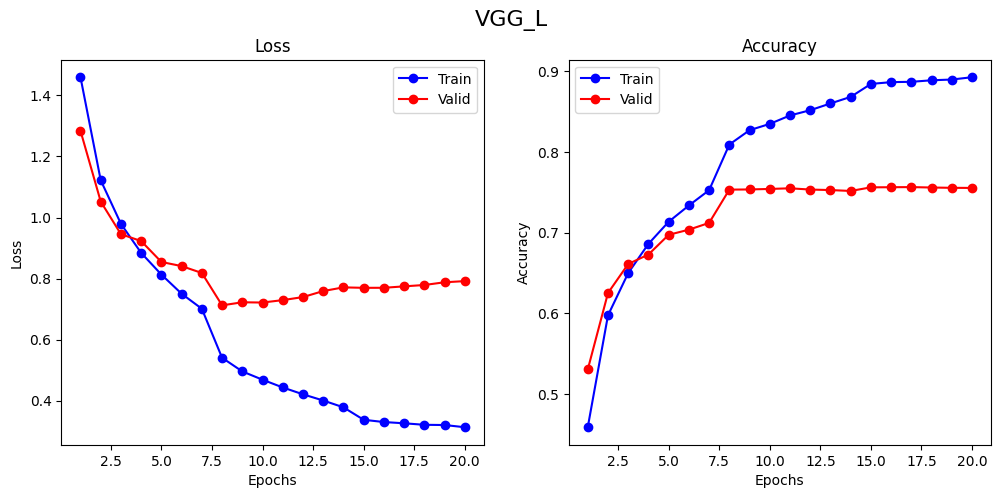

In [10]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [11]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7504

Classification Report:
              precision    recall  f1-score   support

    airplane       0.83      0.84      0.84      9000
  automobile       0.80      0.79      0.79      9000
        bird       0.73      0.72      0.72      9000
         cat       0.62      0.65      0.64      9000
        deer       0.67      0.70      0.69      9000
         dog       0.61      0.59      0.60      9000
        frog       0.83      0.85      0.84      9000
       horse       0.82      0.78      0.80      9000
        ship       0.81      0.82      0.82      9000
       truck       0.78      0.77      0.77      9000

    accuracy                           0.75     90000
   macro avg       0.75      0.75      0.75     90000
weighted avg       0.75      0.75      0.75     90000



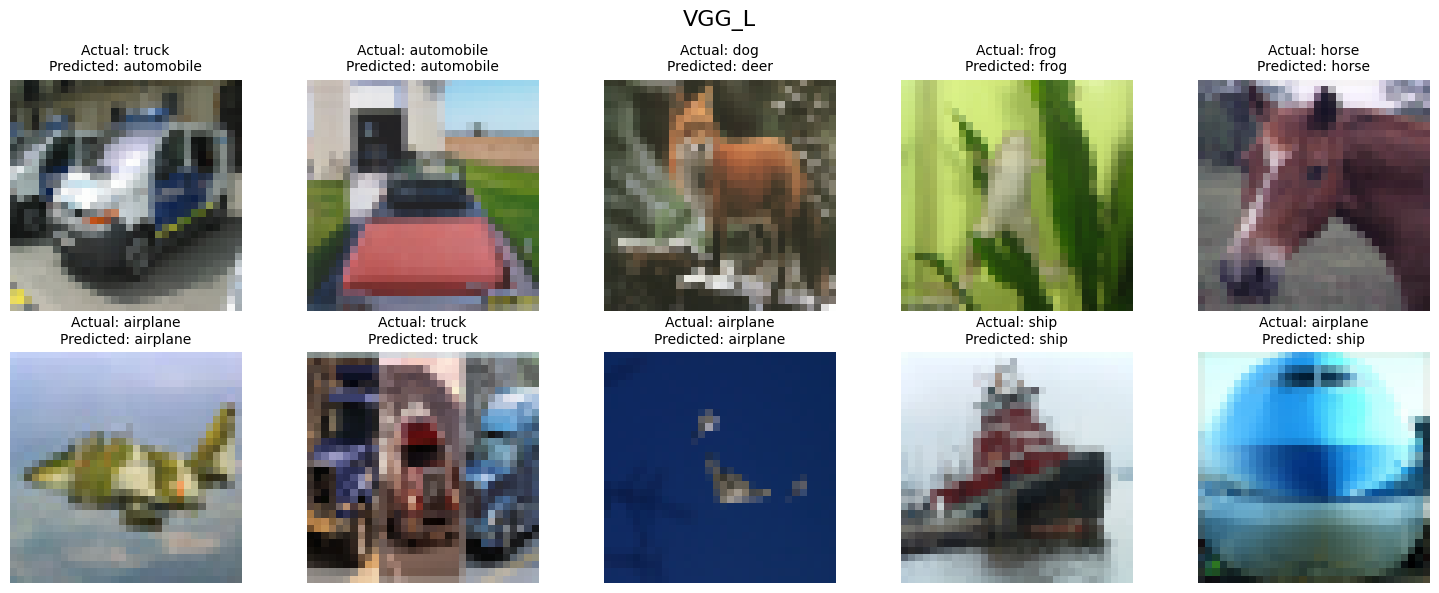

In [12]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)